## This simple example shows how simple data was pulled from a database that is exposed via fast api

In [26]:
import requests
import pandas as pd

# Define the URL of the JSON endpoint
url = "http://0.0.0.0:8000/query-city.json"  # Replace with the actual URL

try:
    # Send an HTTP GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Check for any HTTP request errors

    # Parse the JSON data from the response
    json_data = response.json()
    
    # Create a Pandas DataFrame from the JSON data
    df = pd.DataFrame(json_data)

except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
# Print the whole dataframe
df

In [24]:
# Filter the DataFrame to include only rows with 'CountryCode' equal to 'HRV'
cc_df = df[df['CountryCode'] == 'NLD']

# Calculate the sum of the 'Population' column for the filtered DataFrame
total_population_cc_df = cc_df['Population'].sum()

# List all values from the 'Name' and 'Population' columns
cc_df_values = cc_df[['Name', 'Population', 'District']]

# Print the values for 'Name' and 'Population' where 'CountryCode' is 'HRV'
print(f'Values for CountryCode={cc_df}:')
print(f'{cc_df_values}\n')

# Print the total sum of 'Population' for 'CountryCode' 'HRV'
#print(f"Total Population for CountryCode={cc_df}: {total_population_cc_df}")

Values for CountryCode=              Name CountryCode       District  Population
4        Amsterdam         NLD  Noord-Holland      731200
5        Rotterdam         NLD   Zuid-Holland      593321
6             Haag         NLD   Zuid-Holland      440900
7          Utrecht         NLD        Utrecht      234323
8        Eindhoven         NLD  Noord-Brabant      201843
9          Tilburg         NLD  Noord-Brabant      193238
10       Groningen         NLD      Groningen      172701
11           Breda         NLD  Noord-Brabant      160398
12       Apeldoorn         NLD     Gelderland      153491
13        Nijmegen         NLD     Gelderland      152463
14        Enschede         NLD     Overijssel      149544
15         Haarlem         NLD  Noord-Holland      148772
16          Almere         NLD      Flevoland      142465
17          Arnhem         NLD     Gelderland      138020
18        Zaanstad         NLD  Noord-Holland      135621
19   Hertogenbosch         NLD  Noord-Brabant    

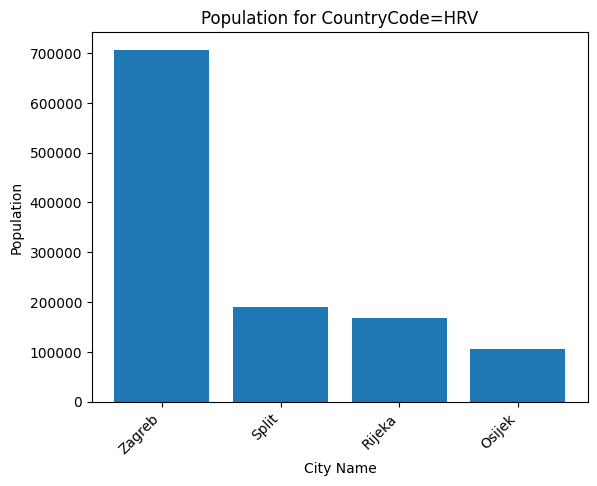

In [25]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows with 'CountryCode' equal to 'HRV'
hrv_df = df[df['CountryCode'] == 'HRV']

# Create a bar plot
plt.bar(hrv_df['Name'], hrv_df['Population'])
plt.xlabel('City Name')
plt.ylabel('Population')
plt.title('Population for CountryCode=HRV')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()